모델의 출력(예측)  y_hat = ax** + bx**2 + bx +d
오차 e = y - y_hat
손실함수 mse  
np.mean(e^2)
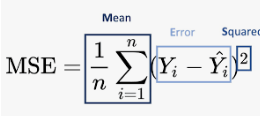

- 기울기 DL / Dseta(seta - a,b,c,d 중에하나)  손실L 이 y_hat을 통해 seta에 의존 연쇄법칙이 가능
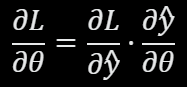

 - 편미분  a로 편미분  x**3
 - 편미분  b로 편미분  x**2
 - 편미분  c로 편미분  x
 - 편미분  c로 편미분  1 

 - 기울기  a 2(y-y_hat)x**3
 - 기울기  b 2(y-y_hat)x**2
 - 기울기  c 2(y-y_hat)x
 - 기울기  d 2(y-y_hat)*1

In [ ]:
import numpy as np
np.random.seed(42)
X = np.linspace(-np.pi,np.pi, 100)
y = np.sin(X) #+ np.random.randn(100)  #  노이즈 추가
# 가중치 초기값
a,b,c,d = 0. , 0. , 0. , 0.
eta  = 1e-3  #learning rate  0.001
epochs = 1000
# 학습과정 기록  손실값, 파라메터의 값
mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )


for epoch in range(epochs):
    y_hat = a*X**3 + b*X**2 + c*X + d
    e = y - y_hat
    # mse
    mse = np.mean(e**2)
    mse_history[epoch] = mse

    # gradients
    da = np.mean(-e*X**3)
    db = np.mean(-e*X**2)
    dc = np.mean(-e*X)
    dd = np.mean(-e)

    #update
    a -= eta*2*da
    b -= eta*2*db
    c -= eta*2*dc
    d -= eta*2*dd

    parameter_history[epoch] = [a,b,c,d]

# 최종결과
print(a,b,c,d,mse)

-0.050959507558349174 -8.782115472449476e-18 0.5562755135570281 2.1713693207411664e-17 0.051856624882668664


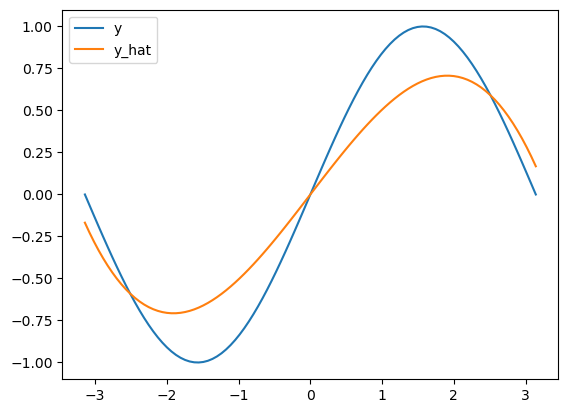

In [190]:
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat, label='y_hat')
plt.legend()
plt.show()


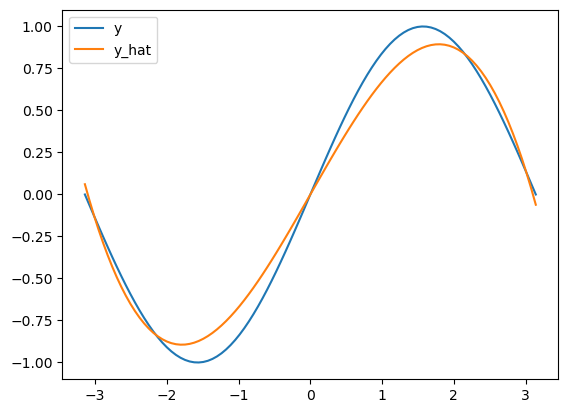

In [191]:
# 텐서로 변경  - 자동미분
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )
for epoch in range(epochs):
    # forward 즉 모델
    y_hat = a*X**3 + b*X**2 + c*X + d
    # 오차
    mse = torch.mean( (y - y_hat)**2  )
    mse.backward()
    mse_history[epoch] = mse.item()
    # 역전파 - 수동
    with torch.no_grad():  # 메모리측면에서 기록을 안한담
        a -= eta*2*a.grad
        b -= eta*2*b.grad
        c -= eta*2*c.grad
        d -= eta*2*d.grad
        # 그레이디언트 초기화
        a.grad.zero_(); b.grad.zero_(); c.grad.zero_(); d.grad.zero_()
    parameter_history[epoch] = [a.item(), b.item(), c.item(), d.item()]

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()

In [ ]:
from torch.optim import Adam
import torch
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )

optim = Adam([ a,b,c,d], lr=eta)
